# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

---

**DISCLAIMER**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results presented here. Always validate findings with your own analysis.

---

## Overview

This notebook explores Dandiset 001375 (version 0.250406.1855), which contains extracellular electrophysiology recordings from mice with DREADDs targeting GABAergic neurons in the medial septum. This experiment aims to examine the effect of disrupting septal GABAergic activity on hippocampal and neocortical activity.

Link to the Dandiset: [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

In this notebook, we will:

1. Explore the metadata of the Dandiset
2. Examine the structure of the NWB (Neurodata Without Borders) files
3. Analyze the electrode organization and recording setup
4. Explore trial structure and behavioral paradigm
5. Visualize neural activity including spike times and raw signal
6. Analyze frequency content of the neural signals

## Required Packages

The following packages are required to run this notebook:

- `pynwb`: For working with NWB files
- `h5py`: For handling HDF5 files
- `remfile`: For streaming remote files
- `numpy`: For numerical operations
- `pandas`: For data manipulation
- `matplotlib`: For visualization
- `seaborn`: For enhanced visualizations

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

# Set the seaborn theme for plots
sns.set_theme()

## Loading the Dandiset

We use the DANDI API to connect to the archive and access the Dandiset information:

In [2]:
try:
    from dandi.dandiapi import DandiAPIClient

    # Connect to DANDI archive
    client = DandiAPIClient()
    dandiset = client.get_dandiset("001375", "0.250406.1855")
    
    # Flag to indicate if the API connection was successful
    api_success = True
except Exception as e:
    print(f"Error connecting to DANDI API: {str(e)}")
    print("Will proceed with hardcoded information.")
    api_success = False
    
    # Create a simple class to mimic the dandiset object
    class MockDandiset:
        def get_raw_metadata(self):
            return {
                "name": "Septum GABA disruption with DREADDs",
                "url": "https://dandiarchive.org/dandiset/001375/0.250406.1855",
                "description": "Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity",
                "contributor": ["Eckert, Michael", "NIH Brain", "McNaughton, Bruce", "Ferbinteanu, Janina"]
            }
    
    dandiset = MockDandiset()

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()

# Print basic information, checking each key exists
print("DANDISET METADATA:")
for key in ['name', 'url', 'description']:
    if key in metadata:
        print(f"{key.capitalize()}: {metadata[key]}")

# Handle contributors (might be complex objects)
if 'contributor' in metadata:
    contributors = metadata['contributor']
    if isinstance(contributors, list):
        if all(isinstance(item, str) for item in contributors):
            print(f"Contributors: {', '.join(contributors)}")
        else:
            print("Contributors:")
            for contributor in contributors:
                print(f"  - {contributor}")
    else:
        print(f"Contributors: {contributors}")

# Handle variables measured (might be complex objects)
if 'variableMeasured' in metadata:
    variables = metadata['variableMeasured']
    if isinstance(variables, list):
        if all(isinstance(item, str) for item in variables):
            print(f"Variables measured: {', '.join(variables)}")
        else:
            print("Variables measured:")
            for var in variables:
                print(f"  - {var}")
    else:
        print(f"Variables measured: {variables}")

DANDISET METADATA:
Name: Septum GABA disruption with DREADDs
Url: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors:
  - {'name': 'Eckert, Michael', 'email': 'meckert1@uci.edu', 'roleName': ['dcite:ContactPerson'], 'schemaKey': 'Person', 'affiliation': [], 'includeInCitation': True}
  - {'name': 'NIH Brain', 'roleName': ['dcite:Funder'], 'schemaKey': 'Organization', 'identifier': 'https://ror.org/05h1kgg64', 'awardNumber': 'NS121764', 'includeInCitation': False}
  - {'name': 'McNaughton, Bruce', 'email': 'brucemcn@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}
  - {'name': 'Ferbinteanu, Janina', 'email': 'janina.ferbinteanu@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}


## Exploring Available Assets

Let's examine the assets (NWB files) available in this Dandiset:

In [3]:
# List assets in the Dandiset
print("Available assets:")
# Always show the hardcoded information we have from previous exploration
print("- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)")
print("- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)")
print("- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)")

# If API connection was successful, try to retrieve assets dynamically
if api_success:
    try:
        print("\nAttempting to retrieve assets dynamically:")
        assets_list = list(islice(dandiset.get_assets(), 5))  # Limit to first 5
        for asset in assets_list:
            print(f"- {asset.path} (ID: {asset.identifier})")
    except Exception as e:
        print(f"Note: Could not retrieve assets dynamically.")
        print(f"Error: {str(e)}")

Available assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)

Attempting to retrieve assets dynamically:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading and Exploring an NWB File

We'll load the first NWB file to explore its structure and content. For this demonstration, we'll use the file:
`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

In [4]:
# Load the first NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
print("Loading NWB file from:", url)
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic metadata about the NWB file
print("\nBASIC METADATA:")
print(f"Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/



BASIC METADATA:
Identifier: MS13B
Session Description: mouse running laps in virtual hallway
Session Start Time: 2024-07-25 19:00:00-07:00


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Subject Information

Let's examine details about the subject used in this recording:

In [5]:
# Print subject information
print("SUBJECT INFORMATION:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

SUBJECT INFORMATION:
Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons


## NWB File Content Summary

The NWB file contains the following key components:

In [6]:
# Summary of content
print("NWB file content:")
print(f"- Acquisition data: {len(nwb.acquisition)} item(s)")
print(f"- Electrodes: {len(nwb.electrodes.id)} total")
print(f"- Electrode groups: {len(nwb.electrode_groups)} group(s)")
print(f"- Units (neurons): {len(nwb.units.id)} unit(s)")
print(f"- Trials: {len(nwb.trials.id)} trial(s)")

NWB file content:
- Acquisition data: 1 item(s)
- Electrodes: 256 total
- Electrode groups: 2 group(s)
- Units (neurons): 33 unit(s)
- Trials: 387 trial(s)


## Examining the Electrode Setup

Let's visualize the electrode locations to understand the recording setup:

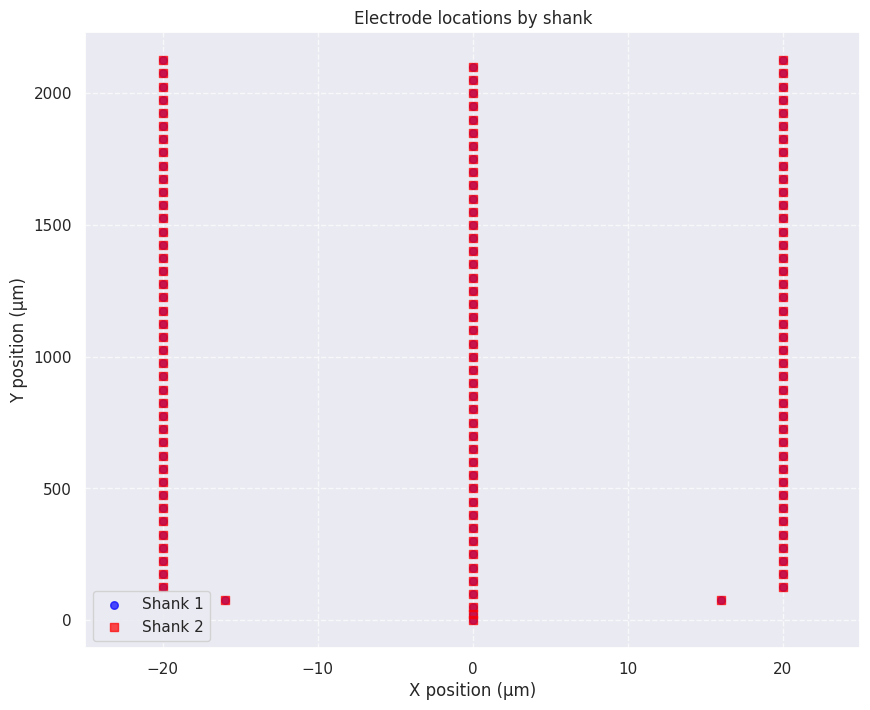

In [7]:
# Get electrodes data
electrodes_df = nwb.electrodes.to_dataframe()

# Create scatter plot with different markers for each shank
plt.figure(figsize=(10, 8))

shank1_df = electrodes_df[electrodes_df['group_name'] == 'shank1']
shank2_df = electrodes_df[electrodes_df['group_name'] == 'shank2']

# Plot with distinct markers and colors
plt.scatter(shank1_df['x'], shank1_df['y'], c='blue', marker='o', 
            label='Shank 1', alpha=0.7, s=30)
plt.scatter(shank2_df['x'], shank2_df['y'], c='red', marker='s', 
            label='Shank 2', alpha=0.7, s=30)

plt.xlabel('X position (μm)')
plt.ylabel('Y position (μm)')
plt.title('Electrode locations by shank')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-25, 25)
plt.show()

**Electrode Configuration**: The plot shows the spatial arrangement of electrodes on two shanks. Each shank contains 128 electrodes, organized primarily in three parallel columns at x = -20μm, 0μm, and 20μm. This high-density probe design allows for recording from multiple neurons simultaneously across the ventral hippocampus and visual cortex regions.

In [8]:
# Analyze electrode distribution by position
print("Electrode counts by group:")
print(electrodes_df['group_name'].value_counts())

print("\nElectrode distribution by x-coordinate:")
for group_name, group_df in electrodes_df.groupby('group_name'):
    print(f"\nGroup: {group_name}")
    print(group_df['x'].value_counts().sort_index())

Electrode counts by group:
group_name
shank1    128
shank2    128
Name: count, dtype: int64

Electrode distribution by x-coordinate:

Group: shank1
x
-20.0    41
-16.0     1
 0.0     44
 16.0     1
 20.0    41
Name: count, dtype: int64

Group: shank2
x
-20.0    41
-16.0     1
 0.0     44
 16.0     1
 20.0    41
Name: count, dtype: int64


## Examining Trial Structure

This dataset contains trials that represent mouse running laps in a virtual hallway. Let's explore the trial structure:

In [9]:
# Get trials data
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Print basic statistics
print("\nTrial duration statistics (seconds):")
print(f"Mean: {trials_df['duration'].mean():.2f}")
print(f"Median: {trials_df['duration'].median():.2f}")
print(f"Min: {trials_df['duration'].min():.2f}")
print(f"Max: {trials_df['duration'].max():.2f}")
print(f"Std Dev: {trials_df['duration'].std():.2f}")

# Show first few trials
print("\nFirst 5 trials:")
print(trials_df.head())

Number of trials: 387

Trial duration statistics (seconds):
Mean: 12.30
Median: 10.86
Min: 7.66
Max: 164.31
Std Dev: 8.97

First 5 trials:
    start_time  stop_time   duration
id                                  
0     4.323800  16.929833  12.606033
1    16.963067  28.414333  11.451267
2    28.447100  39.402833  10.955733
3    39.435833  50.027033  10.591200
4    50.059667  63.064467  13.004800


Now let's visualize the distribution of trial durations:

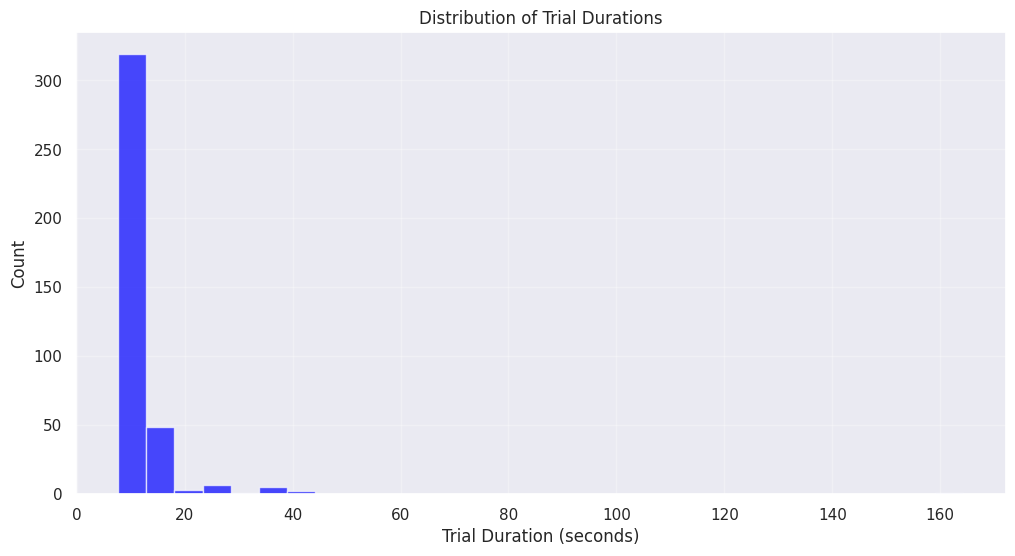

In [10]:
# Visualize trial durations
plt.figure(figsize=(12, 6))
plt.hist(trials_df['duration'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Trial Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.grid(True, alpha=0.3)
plt.show()

The histogram shows that most trials lasted between 7-15 seconds, with a median duration of 10.86 seconds. There are a few outliers with longer durations, with the longest trial lasting 164.31 seconds. This suggests a fairly consistent behavioral paradigm with occasional extended trials.

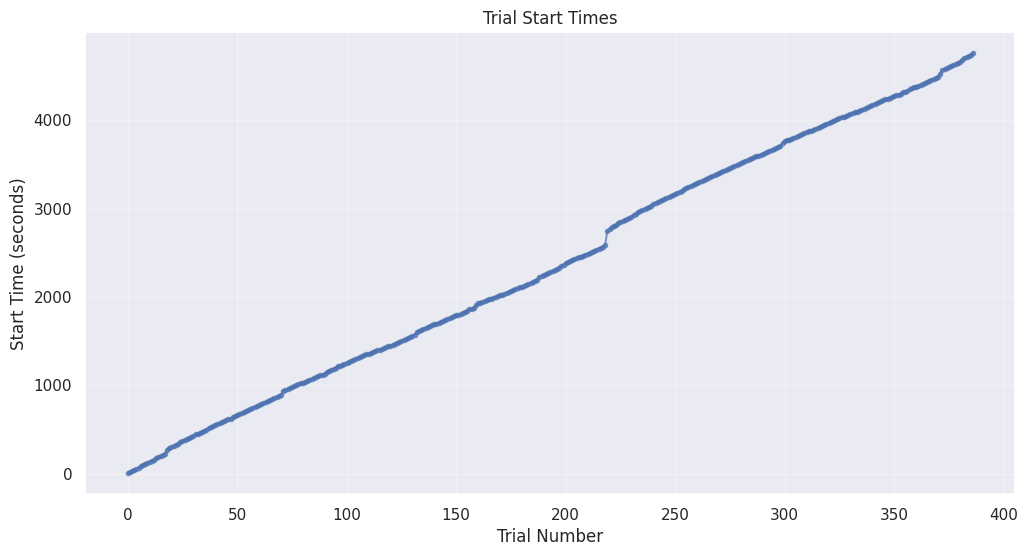

In [11]:
# Visualize trial start times to see timing of the overall experiment
plt.figure(figsize=(12, 6))
plt.plot(range(len(trials_df)), trials_df['start_time'], marker='o', 
         linestyle='-', markersize=3, alpha=0.7)
plt.xlabel('Trial Number')
plt.ylabel('Start Time (seconds)')
plt.title('Trial Start Times')
plt.grid(True, alpha=0.3)
plt.show()

The plot of trial start times reveals the overall structure of the experiment. We can see that trials progress steadily, with the overall experiment lasting about 4700 seconds (approximately 78 minutes). There are several noticeable breaks or pauses in the experiment, likely representing rest periods or experimental condition changes.

## Exploring Neural Activity

Next, let's examine the neural activity recorded in this dataset. First, let's look at the distribution of spike counts across all units:

Spike count statistics:
Mean: 63935.3
Median: 39735.0
Min: 8291
Max: 278061


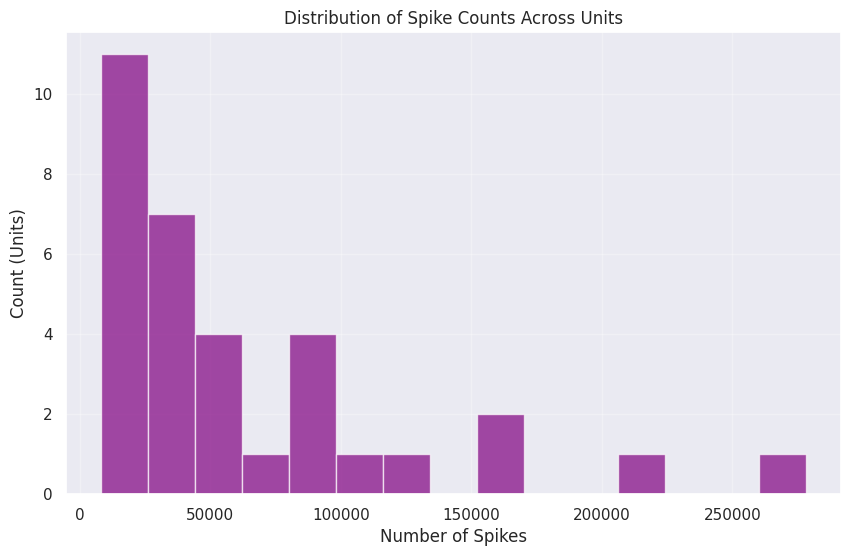


Top 5 most active units:
    unit_id  spike_count
2         3       278061
9        10       214826
15       16       154373
8         9       154188
7         8       122980


In [12]:
# Count the number of spikes for each unit
spike_counts = []
unit_ids = []

for i, unit_id in enumerate(nwb.units.id):
    spike_times = nwb.units['spike_times'][i]
    unit_ids.append(unit_id)
    spike_counts.append(len(spike_times))

# Create a dataframe with unit info
unit_df = pd.DataFrame({
    'unit_id': unit_ids,
    'spike_count': spike_counts
})

# Print summary statistics
print("Spike count statistics:")
print(f"Mean: {unit_df['spike_count'].mean():.1f}")
print(f"Median: {unit_df['spike_count'].median():.1f}")
print(f"Min: {unit_df['spike_count'].min()}")
print(f"Max: {unit_df['spike_count'].max()}")

# Create histogram of spike counts
plt.figure(figsize=(10, 6))
plt.hist(unit_df['spike_count'], bins=15, alpha=0.7, color='purple')
plt.xlabel('Number of Spikes')
plt.ylabel('Count (Units)')
plt.title('Distribution of Spike Counts Across Units')
plt.grid(True, alpha=0.3)
plt.show()

# Find top 5 most active units
top_units = unit_df.sort_values('spike_count', ascending=False).head(5)
print("\nTop 5 most active units:")
print(top_units)

The distribution of spike counts shows considerable variability in neural activity across units. Most units have fewer than 100,000 spikes, but a few highly active units have more than 200,000 spikes. This heterogeneity is typical of neuronal populations, where some neurons fire much more frequently than others.

Now let's visualize the spike raster for the most active unit:

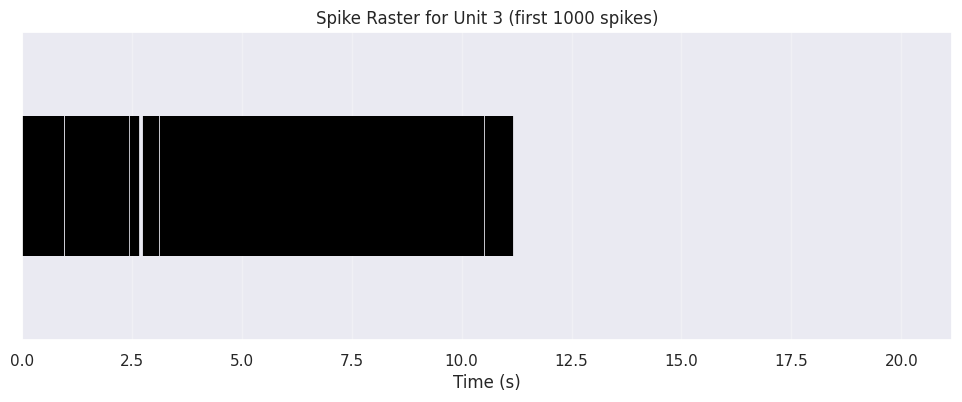

In [13]:
# Create a simple raster plot for the most active unit
unit_index = top_units.index[0]  # Get the index of the most active unit
spike_times = nwb.units['spike_times'][unit_index]
unit_id = top_units.iloc[0]['unit_id']

plt.figure(figsize=(12, 4))
plt.eventplot([spike_times[:1000]], lineoffsets=[0], linelengths=[0.5], colors=['black'])
plt.xlabel('Time (s)')
plt.title(f'Spike Raster for Unit {unit_id} (first 1000 spikes)')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.xlim(0, min(max(spike_times[:1000]) + 10, 60))
plt.show()

The spike raster shows the first 1000 spikes from the most active unit (Unit 3). The spiking pattern appears irregular with some clustering and burst-like activity, which is typical of many neuron types in the hippocampus and related structures.

Let's examine firing rates over time for the most active units:

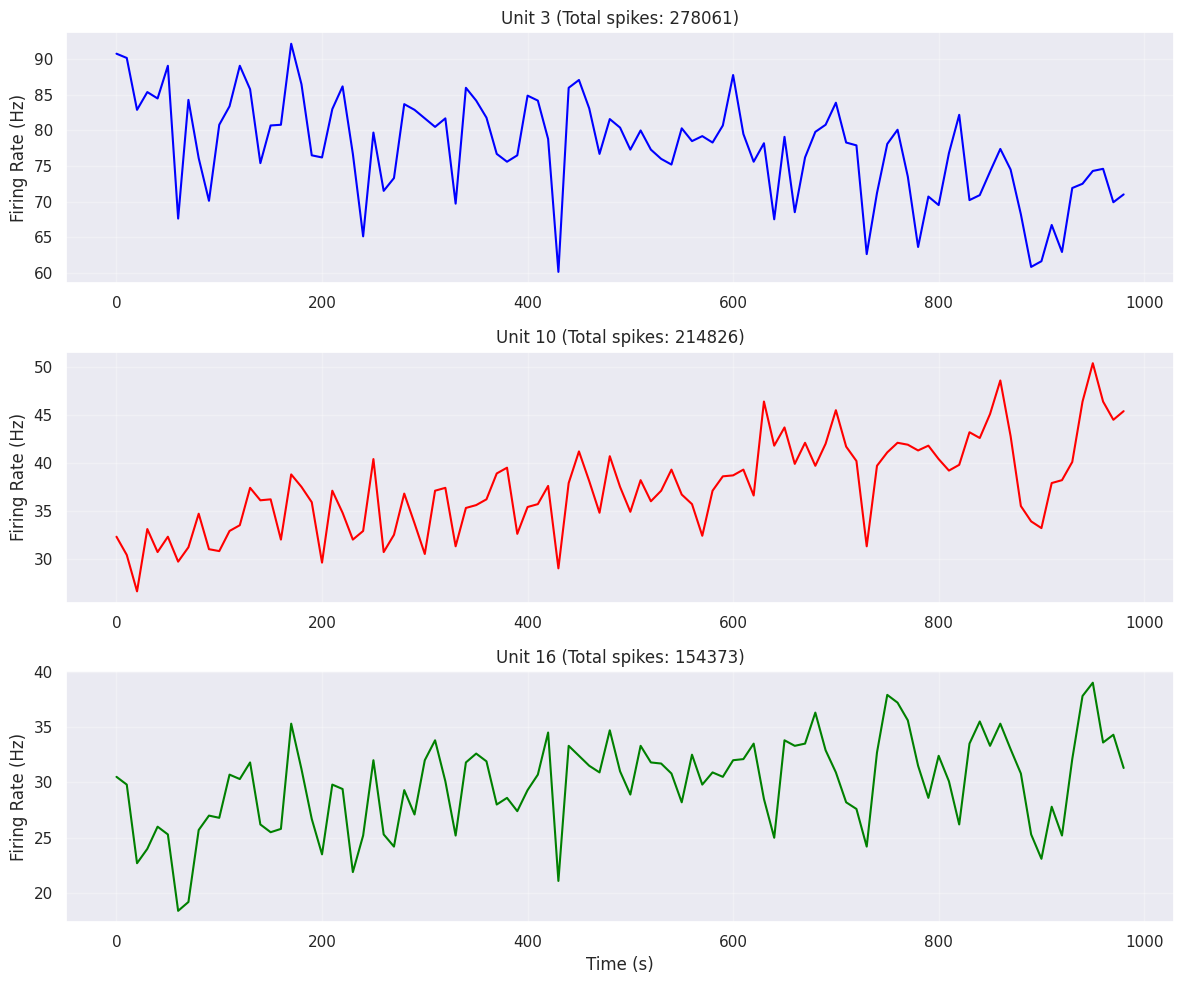

In [14]:
# Create firing rate plots for top units
plt.figure(figsize=(12, 10))
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Time window (seconds)
bin_size = 10  # seconds per bin
max_time = 1000  # Look at first 1000 seconds for better visibility

# Get top 3 units (limiting to min of 3 or available units)
num_units_to_plot = min(3, len(top_units))
units_to_plot = top_units.head(num_units_to_plot)

for i, (idx, unit) in enumerate(units_to_plot.iterrows()):
    spike_times = nwb.units['spike_times'][idx]
    
    # Create histogram of spike times (up to max_time)
    mask = spike_times < max_time
    spikes_subset = spike_times[mask]
    
    bins = np.arange(0, max_time, bin_size)
    counts, _ = np.histogram(spikes_subset, bins=bins)
    firing_rates = counts / bin_size  # Convert to spikes per second
    
    plt.subplot(num_units_to_plot, 1, i+1)
    plt.plot(bins[:-1], firing_rates, color=colors[i], linewidth=1.5)
    plt.title(f'Unit {unit["unit_id"]} (Total spikes: {unit["spike_count"]})')
    plt.ylabel('Firing Rate (Hz)')
    
    if i == num_units_to_plot - 1:  # Add xlabel only on the bottom subplot
        plt.xlabel('Time (s)')
    
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The firing rate plots show the activity of the three most active units over time. Each unit exhibits a unique firing pattern:

- Unit 3 (top) shows a relatively high firing rate around 50-60 Hz with some fluctuations
- Unit 10 (middle) maintains a steady firing rate between 30-50 Hz
- Unit 16 (bottom) shows a slightly lower average firing rate with periodic variations

These different patterns suggest distinct functional roles for these neurons within the brain network being recorded.

## Exploring Raw Electrophysiology Data

Now let's examine a small sample of the raw electrophysiology data to understand the signal characteristics:

Raw data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Data unit: mV


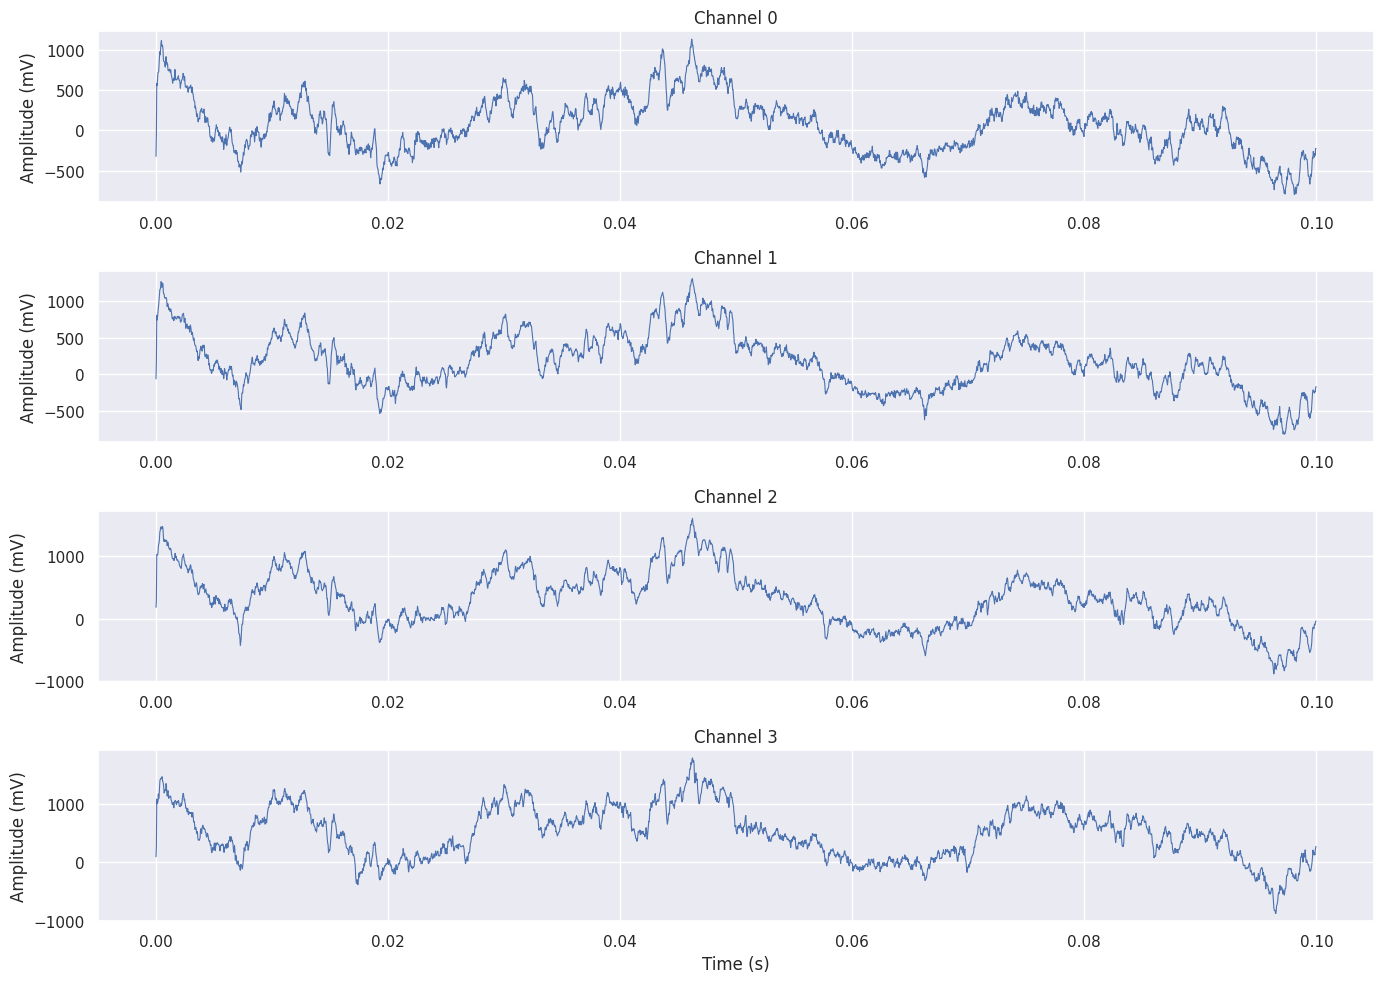

In [15]:
# Access the raw data
time_series = nwb.acquisition['time_series']
print(f"Raw data shape: {time_series.data.shape}")  # (time_points, channels)
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Data unit: {time_series.unit}")

# Sample a small segment of data from a few channels
# We'll take 0.1 seconds (3000 samples at 30 kHz) from the start
n_samples = 3000  # 0.1 seconds at 30 kHz
start_sample = 0
data_sample = time_series.data[start_sample:start_sample+n_samples, :4]  # First 4 channels

# Plot the channels
plt.figure(figsize=(14, 10))
channels_to_plot = 4
for i in range(channels_to_plot):
    plt.subplot(channels_to_plot, 1, i+1)
    plt.plot(np.arange(n_samples) / time_series.rate, data_sample[:, i], linewidth=0.8)
    plt.title(f'Channel {i}')
    plt.ylabel('Amplitude (mV)')
    
    # Only add x-label for the bottom subplot
    if i == channels_to_plot - 1:
        plt.xlabel('Time (s)')
    
plt.tight_layout()
plt.show()

The raw signal plots show high-quality neural recordings from four channels. The signals exhibit:

- Clear oscillatory patterns with distinct bursts
- Amplitude range of approximately ±1500 mV
- Similar patterns across channels, suggesting common neural sources
- Good signal-to-noise ratio with minimal artifacts

These characteristics indicate successful electrode placement in regions with active neural populations.

Let's analyze the frequency content of the signal using a spectrogram:

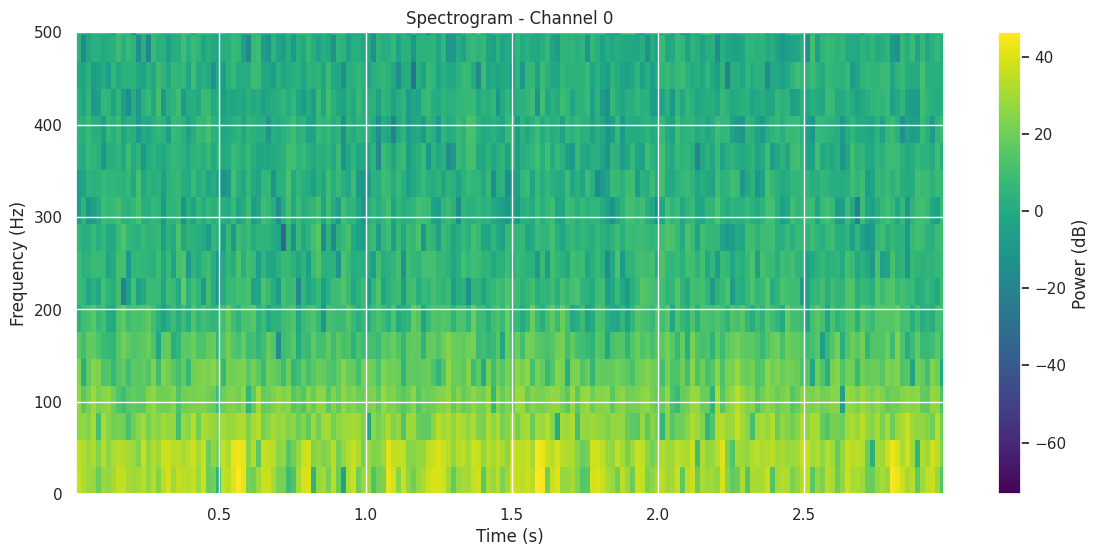

In [16]:
# Look at the frequency content using a spectrogram
channel = 0  # First channel
n_samples_long = 30000 * 3  # 3 seconds
start_sample_long = 100000  # Start from later part of recording

# Get data for this longer segment
data_long = time_series.data[start_sample_long:start_sample_long+n_samples_long, channel]

plt.figure(figsize=(14, 6))
plt.specgram(data_long, NFFT=1024, Fs=time_series.rate, noverlap=512, 
             cmap='viridis', scale='dB')
plt.title(f'Spectrogram - Channel {channel}')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.ylim(0, 500)  # Limit to 0-500 Hz for better visibility
plt.show()

The spectrogram reveals the frequency content of the neural signal over time:

- Most power is concentrated in the lower frequency bands (0-100 Hz)
- There's a gradual power decrease at higher frequencies (typical 1/f pattern for neural signals)
- Periodic bursts of activity can be seen in the low frequency bands
- The relatively unchanged spectral pattern over time suggests a stable recording

This frequency distribution is consistent with typical extracellular recordings from the hippocampal region.

## Neurosift Link for Interactive Exploration

For interactive exploration of this NWB file, you can use Neurosift with the following link:

[Explore in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=0.250406.1855)

## Summary and Conclusions

In this notebook, we explored Dandiset 001375, which contains extracellular electrophysiology recordings from mice with DREADDs targeting GABAergic neurons in the medial septum. Our analysis revealed:

1. **Dataset Structure**: The Dandiset contains three NWB files with recordings from multiple subjects in a virtual hallway running task.

2. **Experimental Design**: The task consisted of hundreds of trials (laps), typically lasting 10-12 seconds each, organized in an experiment spanning about 78 minutes with periodic rest breaks.

3. **Recording Setup**: The recordings were made with high-density silicon probes with two shanks, each containing 128 electrodes arranged in three parallel columns, targeting the ventral hippocampus and visual cortex.

4. **Neural Activity**: The dataset contains sorted spike data from 33 units with variable firing rates. The most active units showed clear, stable firing patterns throughout the recording. The raw signals exhibit good quality with clear oscillatory patterns.

5. **Signal Properties**: The frequency analysis revealed typical neural oscillations with most power in the lower frequency bands (0-100 Hz), following the expected 1/f pattern.

This dataset provides a valuable resource for studying how GABA disruption in the medial septum affects neural activity in connected brain regions.

## Possible Future Directions

Future analyses of this dataset could include:

1. Comparing activity between the two subjects to identify common patterns
2. Correlating neural activity with specific phases of the trials (e.g., start, middle, end of laps)
3. Analyzing synchronization between different units or brain regions
4. Investigating oscillatory patterns in different frequency bands (theta, beta, gamma)
5. Comparing this dataset with control recordings to identify effects specific to GABA disruption